# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [4]:
import numpy as np
import pandas as pd
import matplotlib as mlib

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [5]:
datas = pd.read_csv("../data/states_edu.csv")
datas.head(3)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [10]:
datas.dropna(subset=['AVG_MATH_4_SCORE'], inplace=True)
datas.notna().sum()


PRIMARY_KEY                     565
STATE                           565
YEAR                            565
ENROLL                          398
TOTAL_REVENUE                   440
FEDERAL_REVENUE                 440
STATE_REVENUE                   440
LOCAL_REVENUE                   440
TOTAL_EXPENDITURE               440
INSTRUCTION_EXPENDITURE         440
SUPPORT_SERVICES_EXPENDITURE    440
OTHER_EXPENDITURE               398
CAPITAL_OUTLAY_EXPENDITURE      440
GRADES_PK_G                     487
GRADES_KG_G                     491
GRADES_4_G                      491
GRADES_8_G                      491
GRADES_12_G                     491
GRADES_1_8_G                    398
GRADES_9_12_G                   449
GRADES_ALL_G                    491
AVG_MATH_4_SCORE                565
AVG_MATH_8_SCORE                564
AVG_READING_4_SCORE             521
AVG_READING_8_SCORE             478
dtype: int64

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *ENTER YOUR CHOICE HERE:*
Grade 4 Math

How many years of data are logged in our dataset? 

In [13]:
max(datas["YEAR"]) - min(datas["YEAR"])

29

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [ ]:
data_states = datas.groupby("STATE")
data_states["AVG_MATH_4_SCORE"].mean()

michigan_score = datas.loc[datas['State'] == 'MICHIGAN', "AVG_MATH_4_SCORE"].values[0]
ohio_score = datas.loc[datas['State'] == 'OHIO', "AVG_MATH_4_SCORE"].values[0]


Find the average for your chosen test across all states in 2019

In [28]:
years = datas[datas["YEAR"] == 2019]
avg_score = years["AVG_MATH_4_SCORE"].mean()
avg_score

np.float64(239.9433962264151)

For each state, find a maximum value for your chosen test score

In [ ]:
max_test = datas.groupby("STATE")
max_test["AVG_MATH_4_SCORE"].max()

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [34]:
datas["money_per_student"] = datas["TOTAL_EXPENDITURE"] / datas["ENROLL"]

Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**
---
I thought it would be helpful to have something that you can compare with every state because some states will have lots of funding and lots of students and vice versa

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

<Axes: xlabel='INSTRUCTION_EXPENDITURE', ylabel='AVG_MATH_4_SCORE'>

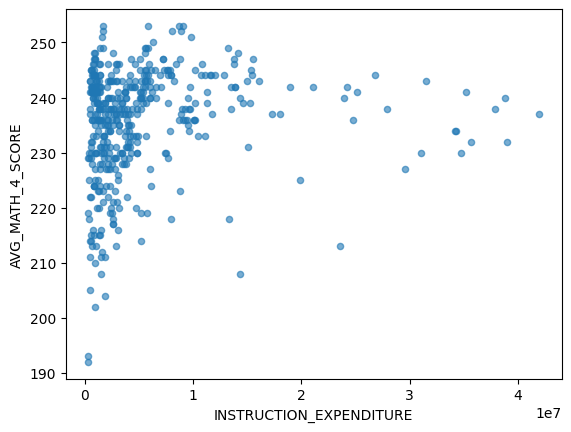

In [43]:
#datas.AVG_MATH_4_SCORE.plot.hist(title="Distribution of 4th Grade Math Scores", edgecolor="black")
datas.plot.scatter(x='INSTRUCTION_EXPENDITURE', y='AVG_MATH_4_SCORE', alpha=0.6)


**I was interested to see if paying teachers more would result in kids recieving a better education**

**Visualization 2**

<Axes: xlabel='ENROLL', ylabel='AVG_MATH_4_SCORE'>

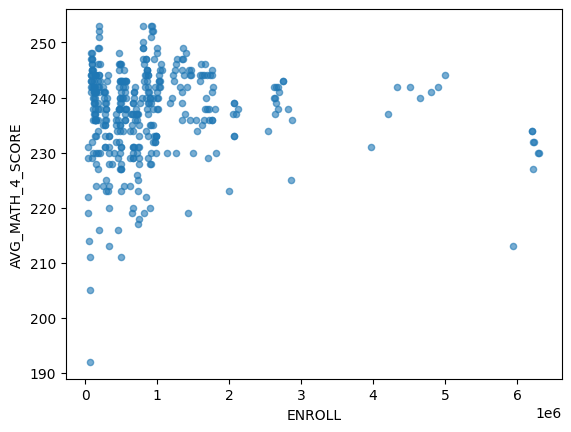

In [44]:
datas.plot.scatter(x='ENROLL', y='AVG_MATH_4_SCORE', alpha=0.6)

**Wanted to see if the numer of students would impact individual teaching**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = datas[['ENROLL_4','AVG_MATH_4_SCORE','AVG_READING_4_SCORE']].dropna()
y = datas.loc[X.index]['AVG_READING_4_SCORE']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [45]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [ ]:
# create your model here
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [ ]:
model.score(X_test, y_test)

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

In [ ]:
 col_name = 'AVERAGE MATH SCORE FOR FOURTH GRADE'

# f = plt.figure(figsize=(12,6))
# plt.scatter(X_train[col_name], y_train, color = "red")
# plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

# plt.legend(['True Training','Predicted Training'])
# plt.xlabel(col_name)
 plt.ylabel('READING 4 SCORE')
# plt.title("Model Behavior On Training Set")

In [ ]:
 col_name = "AVG MATH 4 SCORE"

# f = plt.figure(figsize=(12,6))
# plt.scatter(X_test[col_name], y_test, color = "blue")
# plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

# plt.legend(['True testing','Predicted testing'])
# plt.xlabel(col_name)
 plt.ylabel('Total expenditure')
# plt.title("Model Behavior on Testing Set")
#these last few were a bit confusing